                                                        EDA. DAVID SUÁREZ NIETO
                                                            STUDENT ALCOHOL CONSUMPTION                                                            

**INDEX**

 1. INTRODUCTION

 2. FIRST DATA EXPLORATION

 3. DATA WRANGLING

4. DATA ANALYSIS: 
            4.1 Data analysis: demographic variables ||
            4.2 Data analysis: hipothesis and observations

5. CONCLUSION

---------------

 1. INTRODUCTION

Noways, more and more students are consuming an excessive amount of alcohol with a significantly high frequency. This can be translated into an incipient deterioration of their cognitive functions that can cause difficulties in concentration and decision-taking, causing a detriment to their school performance leading to family problems.

 2. FIRST DATA EXPLORATION

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Source: The following analysis has been carried out from a dataset from Kaggle

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("data/student_mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


**Columns description**

If you want to know what is the meaning of each column, you can read the pdf that is in the "data" folder

**I am going to explore my data**

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.shape

(395, 33)

We can see that the survey was taken from 395 students

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
df.nunique

<bound method DataFrame.nunique of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guar

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


 3. DATA WRANGLING

**Let´s start with DATA CLEANING**

To start with, I am going to check missing values

In [10]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

The dataset does not contain missing values

Time to check duplicated values

In [11]:
df.duplicated().sum()

0

There are not any duplicated values

I am not going to use, at first, the following columns: "school", "famsize", "reason", "schoolsup", "paid", "nursery", "health", "G1", "G2"

In [6]:
data= df.drop(['school', 'famsize', 'reason', 'schoolsup', 'paid', 'nursery', 'health', 'G1', 'G2'], axis=1)
data

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,4,4,at_home,teacher,mother,2,2,0,no,no,yes,no,no,4,3,4,1,1,6,6
1,F,17,U,T,1,1,at_home,other,father,1,2,0,yes,no,yes,yes,no,5,3,3,1,1,4,6
2,F,15,U,T,1,1,at_home,other,mother,1,2,3,no,no,yes,yes,no,4,3,2,2,3,10,10
3,F,15,U,T,4,2,health,services,mother,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,2,15
4,F,16,U,T,3,3,other,other,father,1,2,0,yes,no,yes,no,no,4,3,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,A,2,2,services,services,other,1,2,2,yes,no,yes,no,no,5,5,4,4,5,11,9
391,M,17,U,T,3,1,services,services,mother,2,1,0,no,no,yes,yes,no,2,4,5,3,4,3,16
392,M,21,R,T,1,1,other,other,other,1,1,3,no,no,yes,no,no,5,5,3,3,3,3,7
393,M,18,R,T,3,2,services,other,mother,3,1,0,no,no,yes,yes,no,4,4,1,3,4,0,10


I am going to rename "sex" column with "gender" column

In [7]:
data.rename(columns={'sex':'gender'}, inplace=True)
data

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,4,4,at_home,teacher,mother,2,2,0,no,no,yes,no,no,4,3,4,1,1,6,6
1,F,17,U,T,1,1,at_home,other,father,1,2,0,yes,no,yes,yes,no,5,3,3,1,1,4,6
2,F,15,U,T,1,1,at_home,other,mother,1,2,3,no,no,yes,yes,no,4,3,2,2,3,10,10
3,F,15,U,T,4,2,health,services,mother,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,2,15
4,F,16,U,T,3,3,other,other,father,1,2,0,yes,no,yes,no,no,4,3,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,U,A,2,2,services,services,other,1,2,2,yes,no,yes,no,no,5,5,4,4,5,11,9
391,M,17,U,T,3,1,services,services,mother,2,1,0,no,no,yes,yes,no,2,4,5,3,4,3,16
392,M,21,R,T,1,1,other,other,other,1,1,3,no,no,yes,no,no,5,5,3,3,3,3,7
393,M,18,R,T,3,2,services,other,mother,3,1,0,no,no,yes,yes,no,4,4,1,3,4,0,10


Let´s see if I have outlier values in Age Distribution

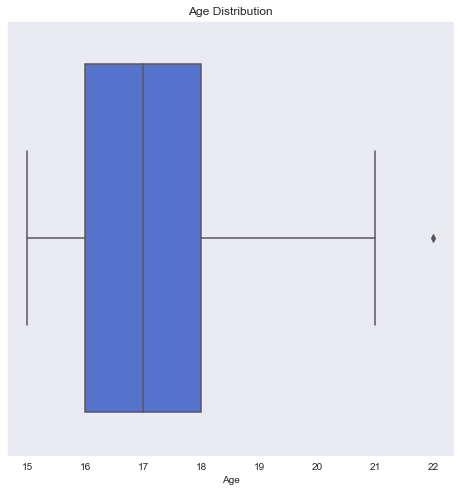

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data["age"], color='royalblue')
plt.title("Age Distribution")
plt.xlabel("Age");
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Age Distribution.png');

In [15]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

To finish with Data Cleaning I am going to delete outlier values

Deleting row Age 21...

In [16]:
data.loc[data["age"]== 21]

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
392,M,21,R,T,1,1,other,other,other,1,1,3,no,no,yes,no,no,5,5,3,3,3,3,7


Deleting row Age 20...

In [17]:
data.loc[data["age"]== 20]

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
306,M,20,U,A,3,2,services,other,other,1,1,0,no,yes,yes,no,no,5,5,3,1,1,0,18
376,F,20,U,T,4,2,health,other,other,2,3,2,yes,no,yes,yes,yes,5,4,3,1,1,4,15
390,M,20,U,A,2,2,services,services,other,1,2,2,yes,no,yes,no,no,5,5,4,4,5,11,9


In [18]:
data.drop([247,392,306,376,390],axis=0,inplace=True)
data

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,4,4,at_home,teacher,mother,2,2,0,no,no,yes,no,no,4,3,4,1,1,6,6
1,F,17,U,T,1,1,at_home,other,father,1,2,0,yes,no,yes,yes,no,5,3,3,1,1,4,6
2,F,15,U,T,1,1,at_home,other,mother,1,2,3,no,no,yes,yes,no,4,3,2,2,3,10,10
3,F,15,U,T,4,2,health,services,mother,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,2,15
4,F,16,U,T,3,3,other,other,father,1,2,0,yes,no,yes,no,no,4,3,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,F,18,U,T,3,1,teacher,services,mother,1,2,0,yes,no,yes,yes,no,4,3,4,1,1,0,8
389,F,18,U,T,1,1,other,other,mother,2,2,1,no,yes,yes,no,no,1,1,1,1,1,0,0
391,M,17,U,T,3,1,services,services,mother,2,1,0,no,no,yes,yes,no,2,4,5,3,4,3,16
393,M,18,R,T,3,2,services,other,mother,3,1,0,no,no,yes,yes,no,4,4,1,3,4,0,10


4. DATA ANALYSIS

    4.1 Data analysis: demographic variables

**Now I am going to do a first Data Analysis in order to preview some demographic variables**

1. Gender Distribution

In [19]:
total_female = data.gender.value_counts()["F"]
total_female

207

In [20]:
total_male = data.gender.value_counts()["M"]
total_male 

183

In [21]:
total = data["gender"].value_counts()
total

F    207
M    183
Name: gender, dtype: int64

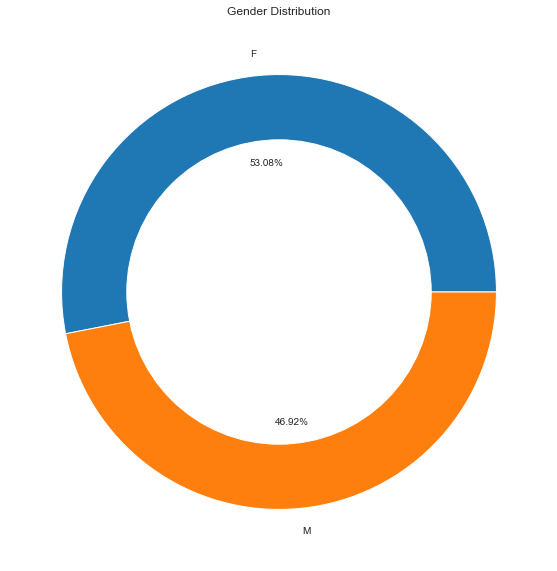

In [22]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender Distribution');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Gender Distribution.png');

We can appreciate that the 53,08% of the students are Female while 46,92% are Male

2. Age Distribution

In [23]:
data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64

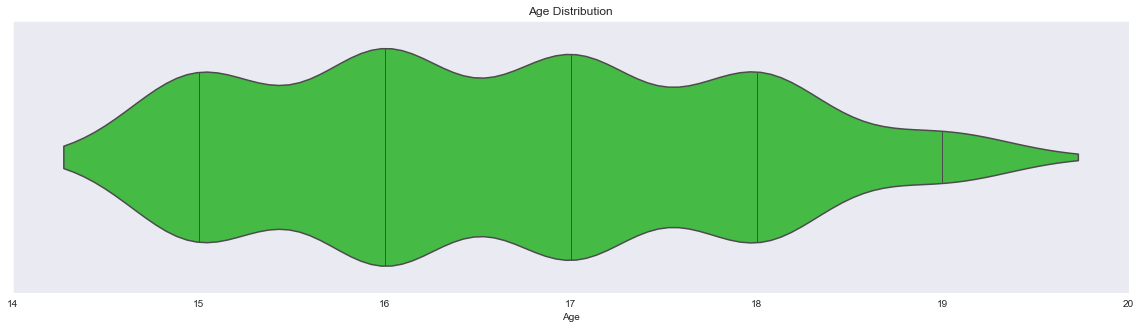

In [24]:
plt.figure(figsize=(20,5))
sns.violinplot(data['age'], color='limegreen', inner='stick');
plt.title('Age Distribution')
plt.xlabel('Age');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Age Distribution2.png');

In [26]:
data['age'].max()

19

In [27]:
data['age'].min()

15

In [28]:
data['age'].mean()

16.646153846153847

In [29]:
data['age'].mode()

0    16
dtype: int64

The age distribution is quite uniform

3. Age mean per gender

In [30]:
x = data.groupby('gender')['age'].mean().round(2)
x

gender
F    16.71
M    16.57
Name: age, dtype: float64

The age mean per gender is identical. Female's mean age is 16 and Male's mean age is 16. This is probably due to the sample has been taken from a college

4. Were there any students who did not consume alcohol? No, there weren´t

In [31]:
len(data[data['Walc']== 0])

0

In [32]:
len(data[data['Dalc']== 0])

0

    4.2 Data analysis: hipothesis and observations

**Note:** It's pretty significant to highligth that when I talk about alcohol consumption it is not a continue variable, it is a frequencie from 1 to 5. Another important fact is that I do not assume there is causality, I am always going to talk about correlation and we do not know if another variable can modulate this correlation.

Once I have done a first demographic studie, I am going to verify my hypothesis

1. **Alcohol consumption decreases with age: Yes, especially at weekends**

In [33]:
data.groupby(['age'])['Dalc'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,82.0,1.353659,0.743232,1.0,1.0,1.0,1.0,5.0
16,104.0,1.432692,0.878706,1.0,1.0,1.0,2.0,5.0
17,98.0,1.520408,0.899365,1.0,1.0,1.0,2.0,5.0
18,82.0,1.548780,0.944803,1.0,1.0,1.0,2.0,5.0
19,24.0,1.458333,0.779028,1.0,1.0,1.0,2.0,3.0


In [34]:
x = data.groupby(['age'])['Dalc'].describe()
df2 = x.reset_index(drop=False)
df2

,age,count,mean,std,min,25%,50%,75%,max
0,15,82.0,1.353659,0.743232,1.0,1.0,1.0,1.0,5.0
1,16,104.0,1.432692,0.878706,1.0,1.0,1.0,2.0,5.0
2,17,98.0,1.520408,0.899365,1.0,1.0,1.0,2.0,5.0
3,18,82.0,1.548780,0.944803,1.0,1.0,1.0,2.0,5.0
4,19,24.0,1.458333,0.779028,1.0,1.0,1.0,2.0,3.0


In [35]:
data.groupby(['age'])['Walc'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,82.0,1.902439,1.202977,1.0,1.00,1.0,3.0,5.0
16,104.0,2.278846,1.339879,1.0,1.00,2.0,3.0,5.0
17,98.0,2.571429,1.251803,1.0,1.25,3.0,3.0,5.0
18,82.0,2.414634,1.314226,1.0,1.00,2.0,3.0,5.0
19,24.0,1.958333,0.858673,1.0,1.00,2.0,3.0,3.0


In [36]:
y = data.groupby(['age'])['Walc'].describe()
df3 = y.reset_index(drop=False)
df3

,age,count,mean,std,min,25%,50%,75%,max
0,15,82.0,1.902439,1.202977,1.0,1.00,1.0,3.0,5.0
1,16,104.0,2.278846,1.339879,1.0,1.00,2.0,3.0,5.0
2,17,98.0,2.571429,1.251803,1.0,1.25,3.0,3.0,5.0
3,18,82.0,2.414634,1.314226,1.0,1.00,2.0,3.0,5.0
4,19,24.0,1.958333,0.858673,1.0,1.00,2.0,3.0,3.0


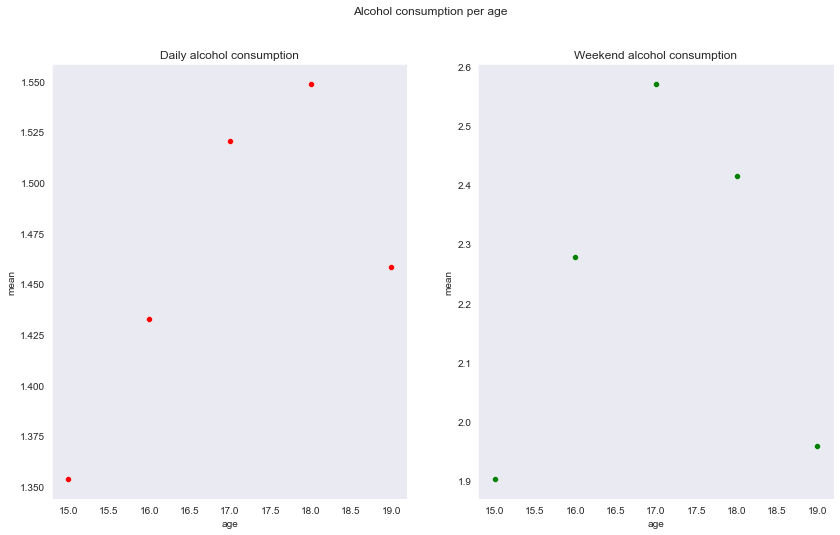

In [37]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))
plt.suptitle('Alcohol consumption per age')

sns.scatterplot(ax=axes[0], data = df2, x = "age", y = "mean", color='red')
axes[0].set_title('Daily alcohol consumption')

sns.scatterplot(ax=axes[1], data = df3, x = "age", y = "mean", color='green')
axes[1].set_title('Weekend alcohol consumption');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Alcohol per age.png');

**Observation:** After performing a scatterplot, I can point out that, in my sample, it can be seen how, indeed, it is decreasing. This is especially relevant on weekends. The explanation may be due to the fact that, with age, responsibilities grow, adolescents mature and no longer need so much excessive social approval derived from continuous social comparison with the peer group. Priorities change, the reference and membership group becomes smaller.

The following graphic is to make sure that I am rigth

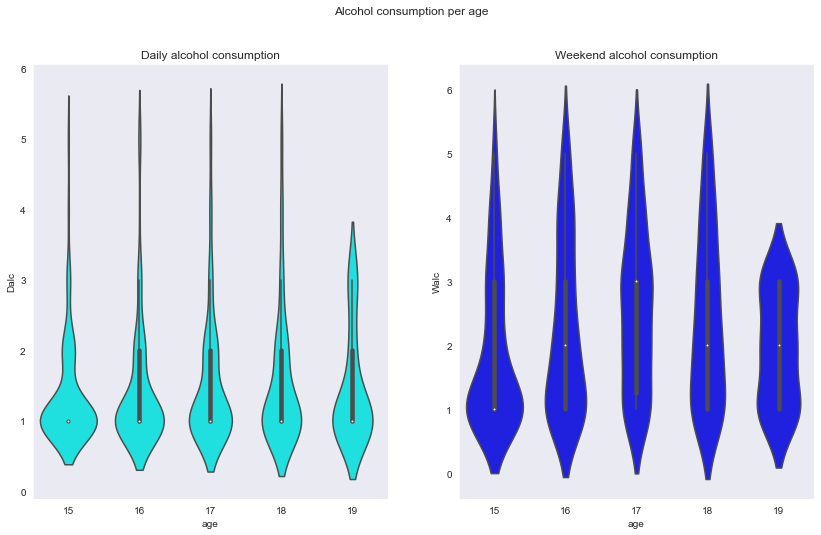

In [38]:
data_edades = data[data['age'] <= 19]

fig, axes = plt.subplots(1, 2, figsize= (14,8))
plt.suptitle('Alcohol consumption per age')

sns.violinplot(ax=axes[0], x='age', y='Dalc', data=data_edades, color='cyan')
axes[0].set_title('Daily alcohol consumption')

sns.violinplot(ax=axes[1], x='age', y='Walc', data=data_edades, color='blue')
axes[1].set_title('Weekend alcohol consumption');

2. **Female students drink more than male students: No, Male students drink more than female students**

In [39]:
data.groupby(['gender'])['Dalc'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,207.0,1.256039,0.597039,1.0,1.0,1.0,1.0,5.0
M,183.0,1.699454,1.044267,1.0,1.0,1.0,2.0,5.0


In [40]:
data.groupby(['gender'])['Walc'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,207.0,1.961353,1.055937,1.0,1.0,2.0,3.0,5.0
M,183.0,2.644809,1.406251,1.0,1.0,3.0,4.0,5.0


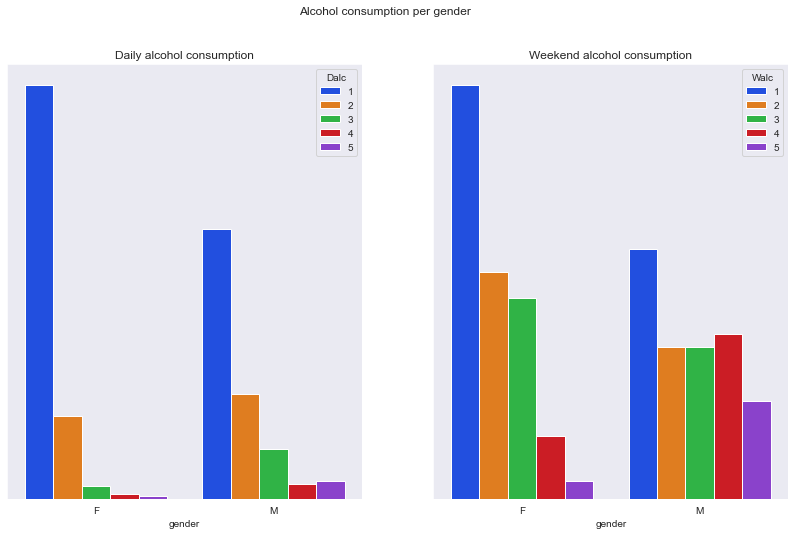

In [41]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))
plt.suptitle('Alcohol consumption per gender')

k = sns.countplot(ax=axes[0], x='gender', data = data, hue='Dalc', palette='bright')
axes[0].set_title('Daily alcohol consumption')
k.yaxis.set_visible(False)

r = sns.countplot(ax=axes[1], x='gender', data = data, hue='Walc', palette='bright')
axes[1].set_title('Weekend alcohol consumption')
r.yaxis.set_visible(False);
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Alcohol per gender.png');



**Observation:** Initially from what we can hear in the media, we can think that women consume more alcohol than men but the countplot graph shows us that this is not the case. We can observe that, both in daily consumption and in weekend consumption, the frequency with which they consume more alcohol is greater in men than in women. This may be due to the fact that the basal ganglia of men generate a greater amount of Dopamine than those of women and, consequently, a greater search for this pleasant effect.

Daily Alcohol Distribution per age and gender

In [42]:
data.groupby(['gender','age']).agg(['mean', 'min', 'max']).round(2)['Dalc']


mean  min  max
gender age                
F      15   1.32    1    4
       16   1.24    1    5
       17   1.24    1    3
       18   1.23    1    4
       19   1.29    1    3
M      15   1.39    1    5
       16   1.64    1    5
       17   1.92    1    5
       18   1.90    1    5
       19   1.70    1    3

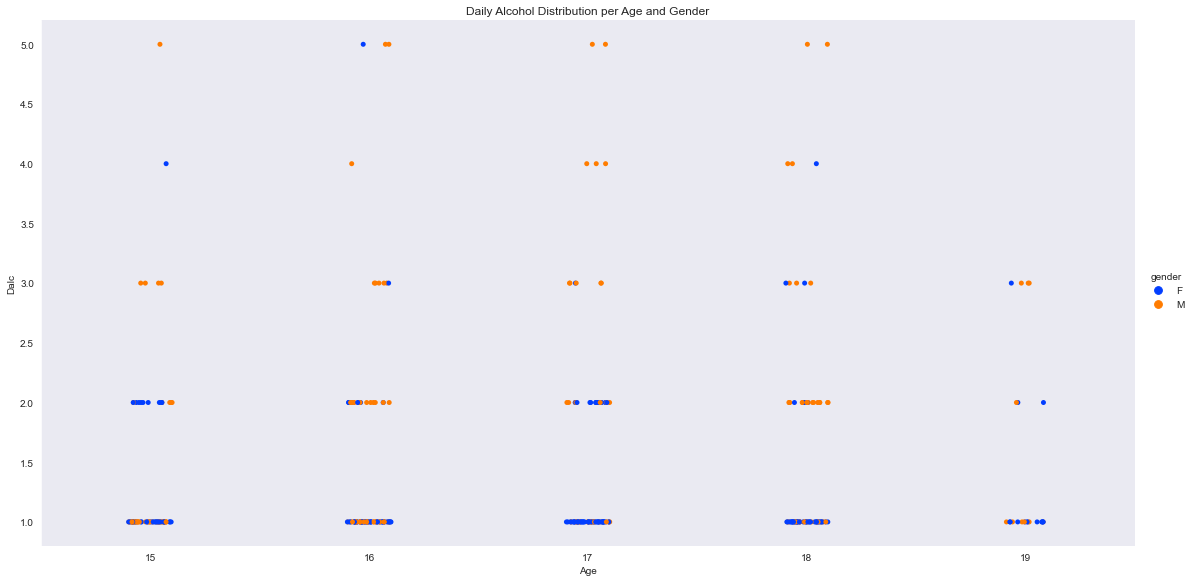

In [43]:
sns.catplot(x = 'age',
                   y = 'Dalc',
                   hue = 'gender',
                   data = data,
                   height = 8,
                   aspect = 2, 
                   palette='bright');
plt.title('Daily Alcohol Distribution per Age and Gender')
plt.xlabel('Age');
plt.ylabel('Dalc');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Dalc per age and gender.png');

**Observation:** The swarmplot graph shows that both daily and weekend alcohol consumption is higher in those students whose tutor is the father. It could be explained that parents, traditionally, in a generalist way, have exercised more authoritarian parenting styles of education.

Weekend Alcohol Distribution per age and gender

In [44]:
data.groupby(['gender','age']).agg(['mean', 'min', 'max']).round(2)['Walc']

mean  min  max
gender age                
F      15   1.84    1    4
       16   2.04    1    5
       17   2.12    1    5
       18   1.77    1    5
       19   1.93    1    3
M      15   1.95    1    5
       16   2.54    1    5
       17   3.22    1    5
       18   3.13    1    5
       19   2.00    1    3

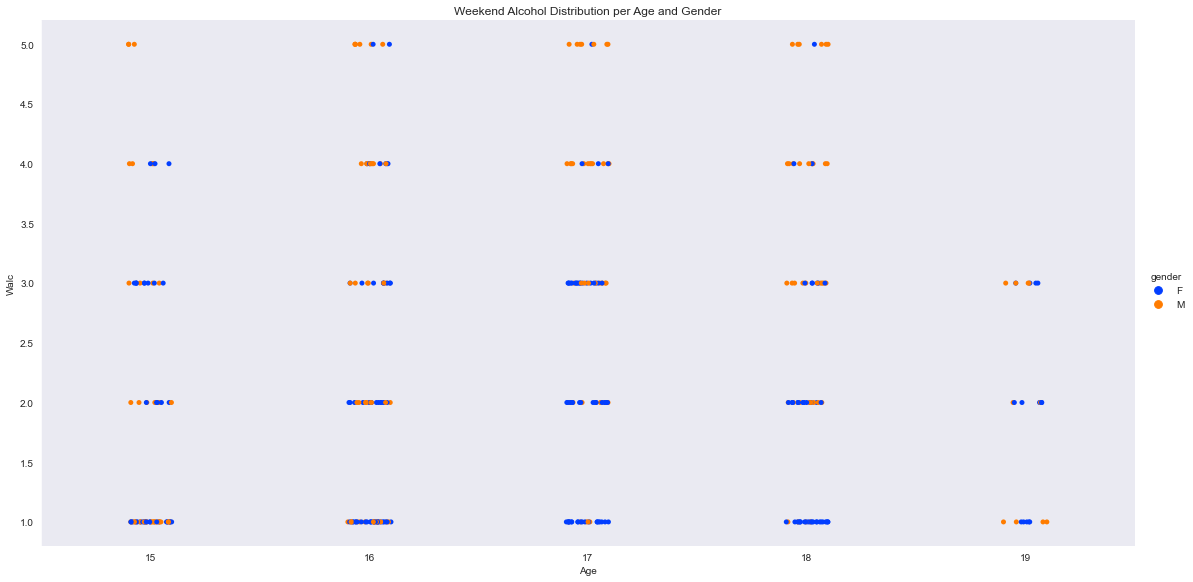

In [45]:
sns.catplot(x = 'age',
                   y = 'Walc',
                   hue = 'gender',
                   data = data,
                   height = 8,
                   aspect = 2,
                   palette='bright');
plt.title('Weekend Alcohol Distribution per Age and Gender');
plt.xlabel('Age');
plt.ylabel('Walc');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Walc per age and gender.png');

**Observation:** The swarmplot graph shows that both daily and weekend alcohol consumption is higher in those students whose tutor is the father. It could be explained that parents, traditionally, in a generalist way, have exercised more authoritarian parenting styles of education.

3. **Does it influence whether the guardian is the mother or the father in the consumption of alcohol? Yes, if the guardian is the father, they drink less**

In [46]:
filtered = data[(data['guardian']=='father')|(data['guardian']=='mother')]
filtered

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,4,4,at_home,teacher,mother,2,2,0,no,no,yes,no,no,4,3,4,1,1,6,6
1,F,17,U,T,1,1,at_home,other,father,1,2,0,yes,no,yes,yes,no,5,3,3,1,1,4,6
2,F,15,U,T,1,1,at_home,other,mother,1,2,3,no,no,yes,yes,no,4,3,2,2,3,10,10
3,F,15,U,T,4,2,health,services,mother,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,2,15
4,F,16,U,T,3,3,other,other,father,1,2,0,yes,no,yes,no,no,4,3,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,F,18,U,T,3,1,teacher,services,mother,1,2,0,yes,no,yes,yes,no,4,3,4,1,1,0,8
389,F,18,U,T,1,1,other,other,mother,2,2,1,no,yes,yes,no,no,1,1,1,1,1,0,0
391,M,17,U,T,3,1,services,services,mother,2,1,0,no,no,yes,yes,no,2,4,5,3,4,3,16
393,M,18,R,T,3,2,services,other,mother,3,1,0,no,no,yes,yes,no,4,4,1,3,4,0,10


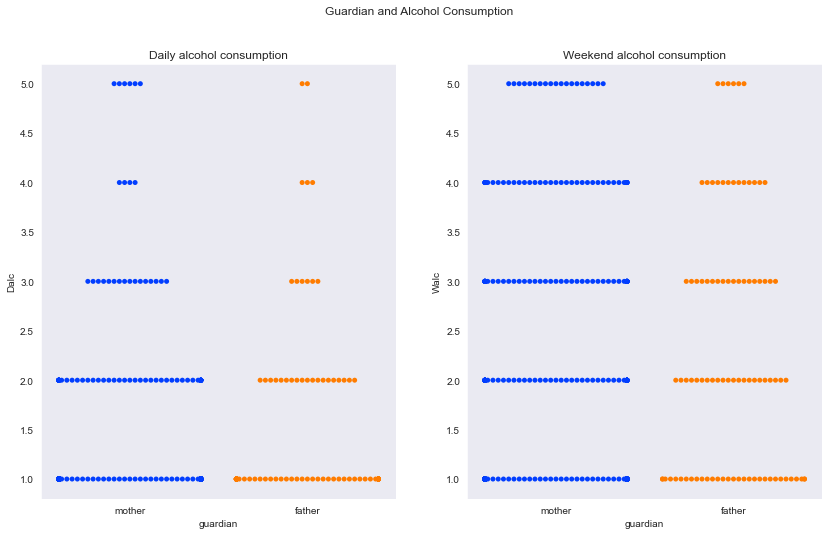

In [47]:
f, axes = plt.subplots(1, 2, figsize= (14,8))
plt.suptitle('Guardian and Alcohol Consumption')

sns.swarmplot(ax=axes[0], x="guardian", y="Dalc", data=filtered, palette='bright')
axes[0].set_title('Daily alcohol consumption')

sns.swarmplot(ax=axes[1], x="guardian", y="Walc", data=filtered, palette='bright')
axes[1].set_title('Weekend alcohol consumption');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Guardian and alcohol consumption.png');

**Observation:** The swarmplot graph shows that both daily and weekend alcohol consumption is higher in those students whose tutor is the father. It could be explained that parents, traditionally, in a generalist way, have exercised more authoritarian parenting styles of education.

4. **Students who receive more family support consume less daily alcohol: No, we can see family support is not related or that there is an inverse relationship**

In [8]:
from utils.function import draw_sunburst

In [9]:
draw_sunburst(data_frame=data, path=['famsup', 'Dalc'], color='famsup', save=True, filename='famsup')

**Observation:** On this occasion, we see that the sunburst shows us a totally different conclusion: those who receive less family support, drink less. The explanation is difficult to find, it may be due to the data.

The following graphic is to make sure that I'am rigth

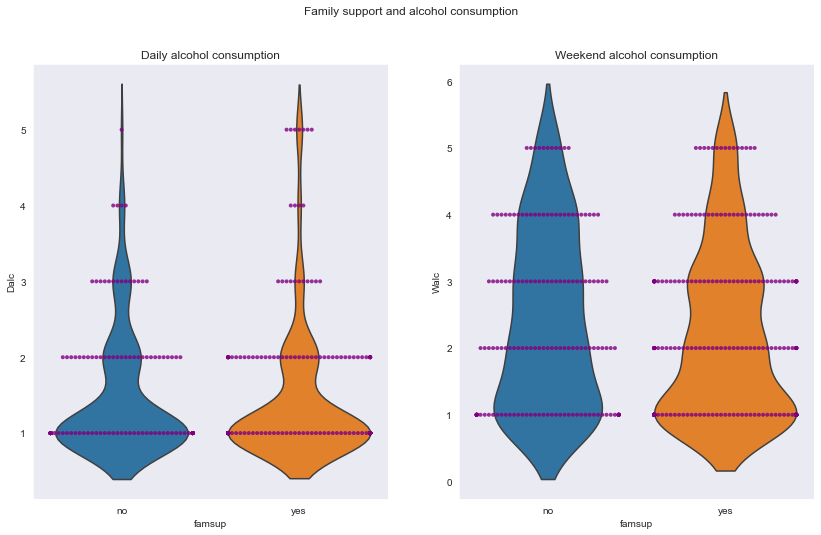

In [ ]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))
plt.suptitle("Family support and alcohol consumption")

sns.violinplot(ax=axes[0],x='famsup',y="Dalc", data=data, split='True', inner=None)
sns.swarmplot(ax=axes[0],x='famsup',y="Dalc", data=data, dodge='True', color='purple', alpha=.8, s=4)
axes[0].set_title('Daily alcohol consumption')

sns.violinplot(ax=axes[1],x='famsup',y="Walc", data=data, split='True', inner=None)
sns.swarmplot(ax=axes[1],x='famsup',y="Walc", data=data, dodge='True', color='purple', alpha=.8, s=4)
axes[1].set_title('Weekend alcohol consumption');

5. **Those students who consume more alcohol in a daily basis, obtain worse final degrees: Yes**

In [1]:
plt.figure(figsize= (100,8))
sns.catplot(y="G3", x="Dalc",hue='gender', kind="swarm", data=data)
plt.suptitle('Alcohol Consumption and Degrees')
plt.show();
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Alcohol Consumption and Degrees.png');

NameError: name 'plt' is not defined

**Observation:** The catplot graph fully verifies this hypothesis. The explanation is obvious to everyone.

6. **Students that live in a rural address drink less than those who live in an urban address: Yes**

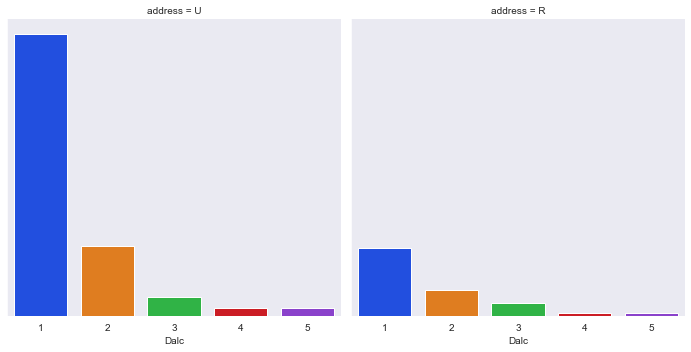

In [60]:
a = sns.catplot(data=data,x="Dalc",col="address",kind="count",col_wrap=3,palette='bright')
a.set(yticklabels=[])
a.set(ylabel=None);
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Adress and Dalc.png');

**Observation:** Taking into account the catplot graph, it is evident that alcohol consumption is higher in those who live in urban areas. The explanations for this conclusion can be based on the fact that in urban areas there are more places to go to buy alcohol since, simply, there is a greater proportion of students who live in these areas and therefore they can meet more easily to consume alcohol . In addition, journeys can be made more easily thanks to public transport.

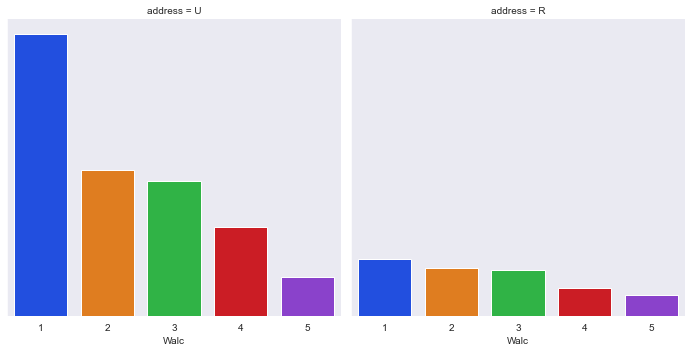

In [61]:
b = sns.catplot(data=data,x="Walc",col="address",kind="count",col_wrap=3,palette='bright')
b.set(yticklabels=[]);
b.set(ylabel=None);
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Adress and Walc.png');

**Observation:** Taking into account the catplot graph, it is evident that alcohol consumption is higher in those who live in urban areas. The explanations for this conclusion can be based on the fact that in urban areas there are more places to go to buy alcohol since, simply, there is a greater proportion of students who live in these areas and therefore they can meet more easily to consume alcohol . In addition, journeys can be made more easily thanks to public transport.

7. **Parents who live together play a greater protective factor against alcohol consumption than parents who are separated: Yes**

In [11]:
draw_sunburst(data_frame=data, path=['Pstatus', 'Walc'], color='Pstatus', save=True, filename='parents')

**Observation:** We could draw the aforementioned conclusions based on the fact that those students whose parents are separated have less vigilance or have gone through a complicated situation that can lead them to use maladaptive coping strategies. The reality is that, by analyzing this graph, I have had the opportunity to see that the data is unbalanced. Said problem will be analyzed in section 6 of this report.

8. **Students who consume less alcohol, want to study a higher education: Yes**

In [13]:
draw_sunburst(data_frame=data, path=['higher', 'Walc'], color='higher',save=True, filename='higher')

**Observation:** Taking into consideration the sunburst, we can find that this hypothesis is verified. The explanation is simple: the lower the alcohol consumption, the more conserved are the cognitive functions of the Dorsal CP involved in decision-making and future planning.

9. **Romantic relationships are a protective factor for less alcohol consumption: Yes**

In [12]:
draw_sunburst(data_frame=data, path=['romantic', 'Walc'], color='romantic', save=True, filename='romantic')

**Observation:** Once again, the sunburst allows us to accept the hypothesis. An argument in favor may be that couple relationships function as an emotional and / or instrumental support, preventing students from engaging in maladaptive coping strategies in the face of stressful life events.

**10.Those students who spend more time using internet, consume more alcohol.**

Let's do a little transformation of the boolean values that internet column takes in order to do a better analysis

In [63]:
data['internet2'] = df.internet.map(dict(yes=1, no=0))

In [64]:
data['internet']=data['internet2']

In [65]:
datainternet = data.drop(['internet2'], axis=1)
datainternet

,gender,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G3
0,F,18,U,A,4,4,at_home,teacher,mother,2,2,0,no,no,yes,0,no,4,3,4,1,1,6,6
1,F,17,U,T,1,1,at_home,other,father,1,2,0,yes,no,yes,1,no,5,3,3,1,1,4,6
2,F,15,U,T,1,1,at_home,other,mother,1,2,3,no,no,yes,1,no,4,3,2,2,3,10,10
3,F,15,U,T,4,2,health,services,mother,1,3,0,yes,yes,yes,1,yes,3,2,2,1,1,2,15
4,F,16,U,T,3,3,other,other,father,1,2,0,yes,no,yes,0,no,4,3,2,1,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,F,18,U,T,3,1,teacher,services,mother,1,2,0,yes,no,yes,1,no,4,3,4,1,1,0,8
389,F,18,U,T,1,1,other,other,mother,2,2,1,no,yes,yes,0,no,1,1,1,1,1,0,0
391,M,17,U,T,3,1,services,services,mother,2,1,0,no,no,yes,1,no,2,4,5,3,4,3,16
393,M,18,R,T,3,2,services,other,mother,3,1,0,no,no,yes,1,no,4,4,1,3,4,0,10


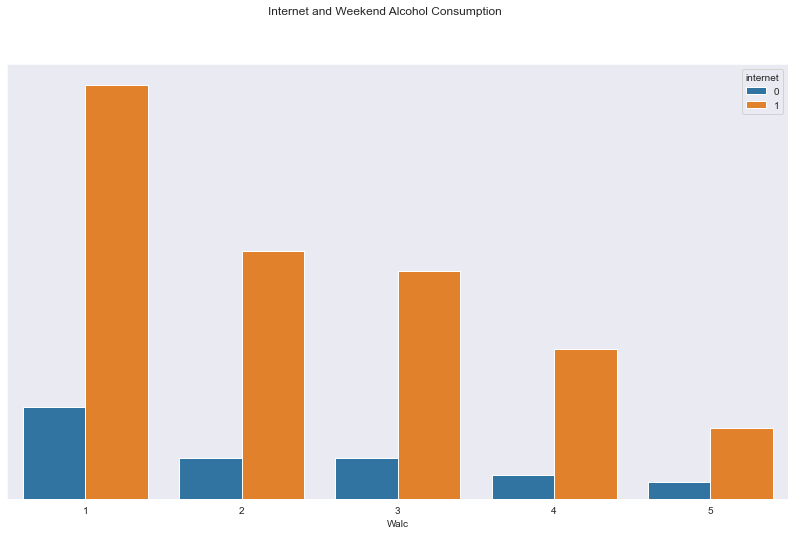

In [66]:
plt.figure(figsize= (14,8))
d = sns.countplot('Walc',hue='internet',data=datainternet)
d.yaxis.set_visible(False)
plt.suptitle('Internet and Weekend Alcohol Consumption');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Internet and Walc.png')

**Observation:** On this occasion, the countplot allows us to confirm the hypothesis. However, before jumping to conclusions, we must remember that the data is unbalanced. Consequently, most students have access to the Internet. 

**In order to explore more relationships between variables in a multivariant analysis, let´s do a Heat Map!**

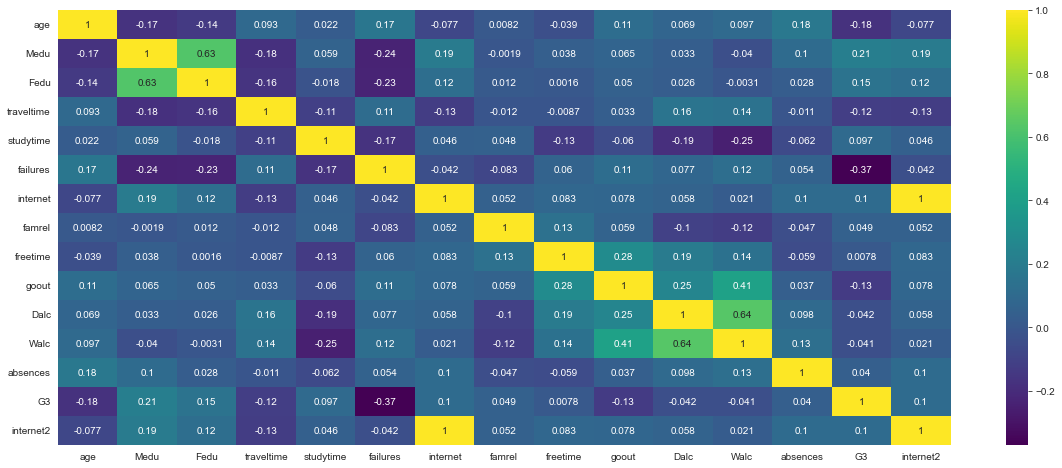

In [67]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap="viridis");
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Heatmap.png');

**Observation: I could affirm that there aren´t significant relationships between different variables because no one is more than 0.5 or 0.7 However, it would be intersting to explore some relations:**

11. **Students that go out more often with friends , consume alcohol at weekends more frequently**

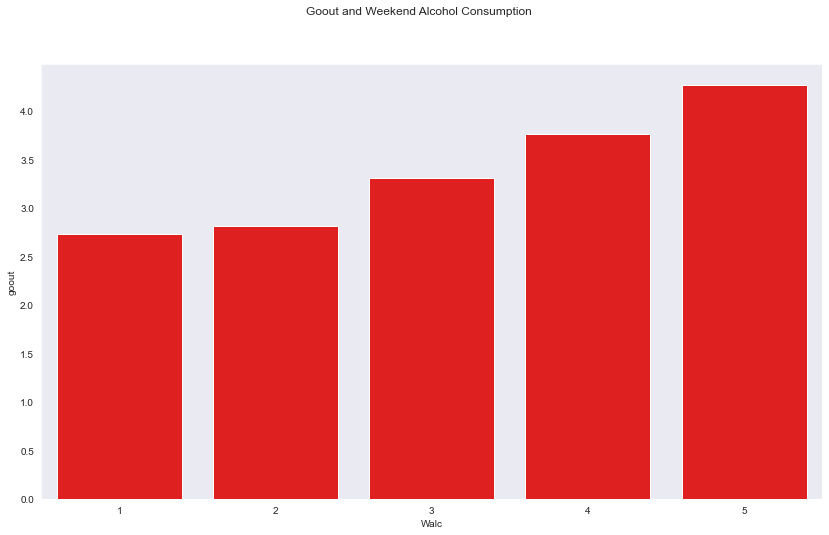

In [80]:
plt.figure(figsize= (14,8))
sns.barplot(x="Walc", y="goout", data=data, ci=None,  color='red')
plt.suptitle('Goout and Weekend Alcohol Consumption');
plt.savefig(r'C:\Users\Master\Documents\Contenido_Bootcamp\carpeta_alumno\EDA\Graphics/Goout and Walc.png');


**Observation:** Although I can not assume that there is a relationship because the correlation is not statistically significant, I could say that taken into account the graphic it could be a pattern because we can appreciate that the more students go out, the more they consume alcohol

More analysis just to verify my hipothesis

In [ ]:
pd.crosstab([data.Walc,data.goout],data.gender,margins=True).style.background_gradient(cmap='summer_r')

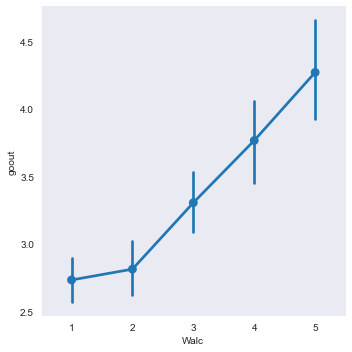

In [ ]:
sns.factorplot('Walc','goout', data=data)
plt.show()

12. **Students that drink more alcohol at weekends, study much less hours: No, there isn't any relationship**

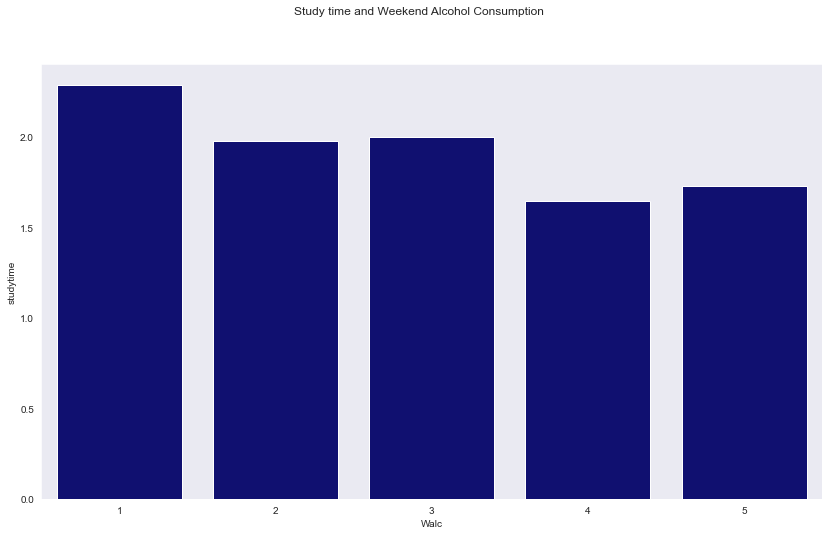

In [ ]:
plt.figure(figsize= (14,8))
sns.barplot(x="Walc", y="studytime", data=data, ci=None,  color='navy')
plt.suptitle('Study time and Weekend Alcohol Consumption');


**Observation:** as with the heatmap, we can not assume any realtionship because the frequency oscillates pretty much 

13. **Students that have more free time, drink daily alcohol more frequently: No, there isn't any relationship**

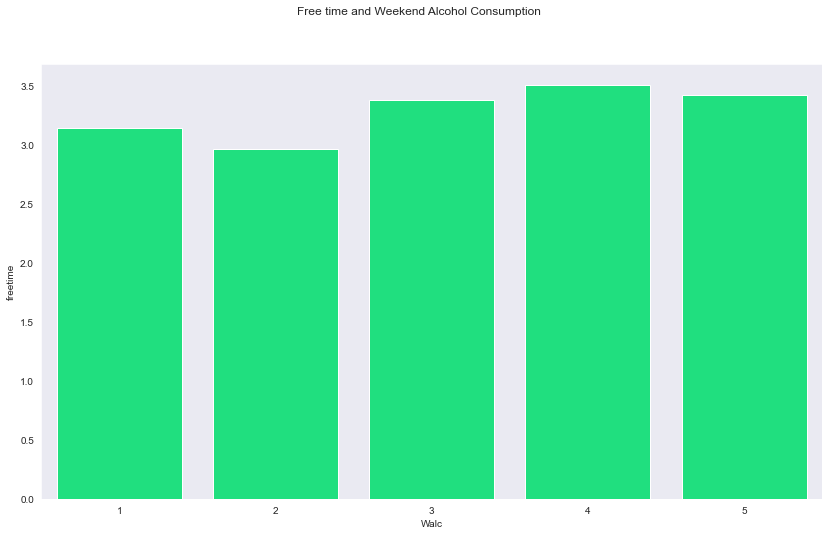

In [ ]:
plt.figure(figsize= (14,8))
sns.barplot(x="Walc", y="freetime", data=data, ci=None,  color='springgreen')
plt.suptitle('Free time and Weekend Alcohol Consumption');


**Observation:** as with the heatmap, we can not assume any realtionship because the frequency oscillates pretty much 

5. CONCLUSION

The hypotheses that have been verified shed light to understand the problem of alcohol consumption in students. However, it is really difficult to modify these variables. A possible solution may be to carry out a psychoeducational psychosocial intervention in the form of a training course with both school students and their families.

    -------------------------THE END------------------------